## Title features correlation to success (measured by ratings)

### Data import and cleaning

In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import json
import string
import requests
import matplotlib.pyplot as plt

In [10]:
# Load the pre-processed CMU movies dataset
movies = pd.read_csv('Data/movies_preprocessed.csv')
movies.head(2)

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,Character_in_title
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['United States of America'],thriller,"['Akooshay', 'Lieutenant Melanie Ballard', 'De...",False
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,['United States of America'],thriller,"['Police Officer', 'Reporter', 'FBI Profiler R...",False


In [11]:
# Load the IMdB ratings dataset
ratings_imdb = pd.read_table('Data/ratings_imdb.tsv', sep='\t')
ratings_imdb.head(2)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2005
1,tt0000002,5.8,269


In [12]:
# Load the IMdB movies dataset
movies_imdb = pd.read_csv('Data/movies_imdb.tsv', sep = '\t')
movies_imdb.head(2)

<!DOCTYPE html><html><head><meta name="google" content="notranslate"><meta http-equiv="X-UA-Compatible" content="IE=edge;"><style nonce="pufYrKhNDJJqqAG-SFT7Wg">@font-face{font-family:'Roboto';font-style:italic;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOkCnqEu92Fr1Mu51xIIzc.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:300;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmSU5fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:400;src:url(//fonts.gstatic.com/s/roboto/v18/KFOmCnqEu92Fr1Mu4mxP.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:500;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmEU9fBBc9.ttf)format('truetype');}@font-face{font-family:'Roboto';font-style:normal;font-weight:700;src:url(//fonts.gstatic.com/s/roboto/v18/KFOlCnqEu92Fr1MmWUlfBBc9.ttf)format('truetype');}</style><meta name="referrer" content="origin"><title>movies_imdb.tsv - Google Drive</title><meta property="og:title" content="movies_imdb.tsv"><meta property="og:type" content="article"><meta property="og:site_name" content="Google Docs"><meta property="og:url" content="https://drive.google.com/file/d/1iF2uzRW61_FrESQ-wt25tWwC69QRQRWH/view?usp=share_link&amp;usp=embed_facebook"><link rel="shortcut icon" href="https://ssl.gstatic.com/images/branding/product/1x/drive_2020q4_32dp.png"><link rel="stylesheet" href="https://fonts.googleapis.com/css?family=Google+Sans:300,400,500,700" nonce="pufYrKhNDJJqqAG-SFT7Wg"><link rel="stylesheet" href="https://www.gstatic.com/_/apps-fileview/_/ss/k=apps-fileview.v.pS9qO3S7_i8.L.W.O/am=IAw/d=0/rs=AO0039tKc00nUh0arlFXLlNzJwi36gJgQQ" nonce="pufYrKhNDJJqqAG-SFT7Wg"><script nonce="dlpJ4P03a7d5BQdmYvRibQ">_docs_flag_initialData={"docs-ails":"docs_cold","docs-fwds":"docs_sdf","docs-crs":"docs_crs_nl","docs-fe-re":2,"docs-fl":1,"docs-l1lc":4,"docs-l1lm":"ZRH","docs-l2lc":4,"docs-l2lm":"GRQ","docs-l2t":0,"docs-lsd":3,"docs-orl":1,"docs-shdn":0,"docs-tfh":"","docs-eett":true,"info_params":{},"docs-earwdm":false,"docs-ebuwdwm":false,"docs-ecsdwm":false,"docs-edceidwm":false,"docs-eecdwm":false,"docs-eecpdm":false,"docs-easdwm":false,"docs-eadwm":false,"docs-eaodwm":true,"docs-easedm":true,"docs-eapdwm":false,"docs-bbmdwm":true,"docs-ecddwm":false,"docs-ecsdw":false,"docs-edatadm":false,"docs-edwewm":false,"docs-eedwdwm":false,"docs-eedawm":false,"docs-efewdm":false,"docs-efwm":false,"docs-egfdwm":false,"docs-ehldrdm":true,"docs-eidw":false,"docs-emhdwm":true,"docs-empdwm":true,"docs-enpdwm":false,"docs-wiz-endm":false,"docs-eppdm":false,"docs-wiz-epdwm":false,"docs-epdwm":false,"docs-eridwm":true,"docs-erddm":false,"docs-erdwm":true,"docs-edsedw":false,"docs-esdodwm":false,"docs-esidm":false,"docs-esfdm":true,"docs-euddwm":false,"docs-eedm":true,"docs-eipdwm":false,"docs-eoiidwm":false,"docs-eubcdwm":false,"docs-erfdwm":false,"docs-cpm":false,"docs-cpr":false,"docos-edutfr":false,"uls":"","customer_type":"ND","docs-obsImUrl":"https://ssl.gstatic.com/docs/common/netcheck.gif","docs-ecuach":false,"docs-ecci":false,"docs-esi":false,"docs-cei":{"i":[70983243,50492410,50127660,49700098,49451659,71321762,71185138,71290182,49979626,49816025,50580192,5796211,5714051,50082848,5712270,71529430,71314999,71530191,71401173,50285445,50606495,50495792,49453005,71330661,48966262,49517626,50347682,71402445,50335937,5711538,49453894,50167079,71079012,71603192,49823132,49472091,49765402,5746992,49375342,49623141,49924734,50291140,49824083,5771837,71239074,71382526,50529271,71240933,5732271,5779500,5704695,71038182,5712639,50322383,50273576,71152193,71119946,49643963,71054470,5712647,49613648,49372463,50359988,50505315,50513182,5747066,50594504,50468041,49622751,49376021,5771857,71102112,49822889,5744348,71396833,50218262,5748810,50204463,5737800,71537746,50221868,70977068,71273697,5742841,49378909,50238801,49376357,50168335,50520367,49624200,5704745,71197914,50360884,49842923,71035328,5792878,71480204,5

In [13]:
# Load the Rotten tomatoes dataset
movies_rotten = pd.read_csv('Data/movies_rottentomatoes.csv', sep = ',')
movies_rotten.head(2)

,rotten_tomatoes_link,movie_title,movie_info,critics_consensus,content_rating,genres,directors,authors,actors,original_release_date,...,production_company,tomatometer_status,tomatometer_rating,tomatometer_count,audience_status,audience_rating,audience_count,tomatometer_top_critics_count,tomatometer_fresh_critics_count,tomatometer_rotten_critics_count
0,m/0814255,Percy Jackson & the Olympians: The Lightning T...,"Always trouble-prone, the life of teenager Per...",Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,...,20th Century Fox,Rotten,49.0,149.0,Spilled,53.0,254421.0,43,73,76
1,m/0878835,Please Give,Kate (Catherine Keener) and her husband Alex (...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,...,Sony Pictures Classics,Certified-Fresh,87.0,142.0,Upright,64.0,11574.0,44,123,19


In [14]:
# Several movies have the same title, some movies with the same title are even released the same year.
# That's why the datasets will be merged on a set of parameters : [Movie title, Release date, Runtime]
duplicates_name_date = movies[movies.duplicated(subset=['Movie_name', 'Movie_release_date'], keep=False)]
print(duplicates_name_date.shape)
duplicates_name_date.head(2)

(48, 11)


,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,Character_in_title
51,51,7460227,/m/0kv80y,The Bridge,2006,NaN,69.0,['United States of America'],drama,"['Scientologist #3', 'Scientology Leader', 'Sc...",False
231,231,4953051,/m/0cwvf3,The Bridge,2006,NaN,94.0,"['United States of America', 'United Kingdom']",documentary,NaN,NaN


In [17]:
duplicates_name_date_runtime = movies[ movies.duplicated(subset=['Movie_name', 'Movie_release_date', 'Movie_runtime'], keep=False)]
print(duplicates_name_date_runtime.shape)

(4, 11)


In [16]:
# Clean the IMdB movies dataset :
# Make a deep copy of the database
movies_imdb_filtered = movies_imdb.copy(deep=True)

# Remove unuseful columns
drop_col = ['titleType', 'primaryTitle', 'isAdult', 'genres', 'endYear']
movies_imdb_filtered.drop(drop_col, axis =1, inplace=True)

# Rename useful columns
movies_imdb_filtered = movies_imdb_filtered.rename(
    columns={
        "startYear": "Movie_release_date",
        "originalTitle": "Movie_name",
        "runtimeMinutes": "Movie_runtime",
    }
)

movies_imdb_filtered.head(2)

KeyError: "['titleType', 'primaryTitle', 'isAdult', 'genres', 'endYear'] not found in axis"

In [ ]:
# Remove NaN values in the columns used for the merge
print('Size of the IMdB movies dataset with NaN values: ', movies_imdb_filtered.shape)

movies_imdb_filtered['Movie_release_date'] = movies_imdb_filtered['Movie_release_date'].replace('\\N', np.nan)
movies_imdb_filtered.dropna(subset=['Movie_release_date'], inplace =True)
pd.to_datetime(movies_imdb_filtered['Movie_release_date'], format='%Y') # keep only the year
movies_imdb_filtered['Movie_release_date'] = movies_imdb_filtered['Movie_release_date'].astype('int')

movies_imdb_filtered['Movie_runtime'] = movies_imdb_filtered['Movie_runtime'].replace('\\N', np.nan)
movies_imdb_filtered.dropna(subset=['Movie_runtime'], inplace =True)
movies_imdb_filtered['Movie_runtime'] = movies_imdb_filtered['Movie_runtime'].astype('float64', errors='ignore')

movies_imdb_filtered = movies_imdb_filtered.drop_duplicates( subset=["Movie_name", "Movie_release_date", "Movie_runtime"] )

print('Size of the IMdB movies dataset without NaN values: ', movies_imdb_filtered.shape)
movies_imdb_filtered.head(2)

Size of the IMdB movies dataset with NaN values:  (10293183, 4)
Size of the IMdB movies dataset without NaN values:  (2728882, 4)


,tconst,Movie_name,Movie_release_date,Movie_runtime
0,tt0000001,Carmencita,1894,1.0
1,tt0000002,Le clown et ses chiens,1892,5.0


In [ ]:
# Remove the more recent movies
print('Size of the IMdB movies dataset with all release dates : ', movies_imdb_filtered.shape)
movies_imdb_filtered = movies_imdb_filtered[movies_imdb_filtered.Movie_release_date <= 2012]
print('Size of the IMdB movies dataset with : ', movies_imdb_filtered.shape)

Size of the IMdB movies dataset with all release dates :  (2728882, 4)


Size of the IMdB movies dataset with :  (1498895, 4)


In [ ]:
# Clean the IMdB ratings dataset :
# Rename useful columns
ratings_imdb = ratings_imdb.rename(
    columns={
        "averageRating": "Audience_imdb_rating",
        "numVotes": "Audience_imdb_count"
    }
)

In [ ]:
# Merge IMdB movies and ratings datasets
df_imdb = movies_imdb_filtered.merge(ratings_imdb, on='tconst', how='inner')
print('Size of the IMdB dataset with the ratings : ', df_imdb.shape)
df_imdb.drop('tconst', axis =1, inplace=True)
df_imdb.head(2)

Size of the IMdB dataset with the ratings :  (588499, 6)


,Movie_name,Movie_release_date,Movie_runtime,Audience_imdb_rating,Audience_imdb_count
0,Carmencita,1894,1.0,5.7,2005
1,Le clown et ses chiens,1892,5.0,5.8,269


In [ ]:
# Clean the Rotten tomatoes dataset :
# Make a deep copy of the database
movies_rotten_filtered = movies_rotten.copy(deep=True)

# Remove unuseful columns
drop_col = ['rotten_tomatoes_link', 'critics_consensus', 'content_rating', 'genres', 'streaming_release_date', 'tomatometer_status', 'audience_status', 
            'tomatometer_top_critics_count', 'tomatometer_fresh_critics_count', 'tomatometer_rotten_critics_count', 'movie_info']
movies_rotten_filtered.drop(drop_col, axis =1, inplace=True)

# Rename useful columns
movies_rotten_filtered = movies_rotten_filtered.rename(
    columns={
        "original_release_date": "Movie_release_date",
        "movie_title": "Movie_name",
        "runtime": "Movie_runtime",
        "directors": "Directors",
        "authors": "Authors",
        "actors":"Actors_rotten",
        "tomatometer_rating": "Critics_rotten_rating",
        "tomatometer_count": "Critics_rotten_count",
        "audience_rating": "Audience_rotten_rating",
        "audience_count": "Audience_rotten_count",
        "production_company": "Production_company",
    }
)

movies_rotten_filtered.head(2)

,Movie_name,Directors,Authors,Actors_rotten,Movie_release_date,Movie_runtime,Production_company,Critics_rotten_rating,Critics_rotten_count,Audience_rotten_rating,Audience_rotten_count
0,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,119.0,20th Century Fox,49.0,149.0,53.0,254421.0
1,Please Give,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,90.0,Sony Pictures Classics,87.0,142.0,64.0,11574.0


In [ ]:
# Remove NaN values in the columns used for the merge
print('Size of the Rotten tomatoes dataset with NaN values: ', movies_rotten_filtered.shape)

movies_rotten_filtered.dropna(subset=['Movie_release_date'], inplace =True)
movies_rotten_filtered['Movie_release_date'] = pd.to_datetime(movies_rotten_filtered['Movie_release_date'])
movies_rotten_filtered['Movie_release_date'] = movies_rotten_filtered['Movie_release_date'].dt.year
movies_rotten_filtered['Movie_release_date'] = movies_rotten_filtered['Movie_release_date'].astype('int')

movies_rotten_filtered.dropna(subset=['Movie_runtime'], inplace =True)
movies_rotten_filtered['Movie_runtime'] = movies_rotten_filtered['Movie_runtime'].astype('float64', errors='ignore')

print('Size of the Rotten tomatoes dataset without NaN values: ', movies_rotten_filtered.shape)
movies_rotten_filtered.head(2)

Size of the Rotten tomatoes dataset with NaN values:  (17712, 11)
Size of the Rotten tomatoes dataset without NaN values:  (16382, 11)


,Movie_name,Directors,Authors,Actors_rotten,Movie_release_date,Movie_runtime,Production_company,Critics_rotten_rating,Critics_rotten_count,Audience_rotten_rating,Audience_rotten_count
0,Percy Jackson & the Olympians: The Lightning T...,Chris Columbus,"Craig Titley, Chris Columbus, Rick Riordan","Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010,119.0,20th Century Fox,49.0,149.0,53.0,254421.0
1,Please Give,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010,90.0,Sony Pictures Classics,87.0,142.0,64.0,11574.0


In [ ]:
# Merging IMdB dataset and pre-processed CMU movies dataset on [Movie title, Release date, Runtime]
cmu_imdb = movies.merge(df_imdb, on=['Movie_name', 'Movie_release_date', 'Movie_runtime'], how='inner')
print('Size of the CMU-IMdB dataset : ', cmu_imdb.shape)
cmu_imdb.head(1)

Size of the CMU-IMdB dataset :  (13825, 13)


,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,Character_in_title,Audience_imdb_rating,Audience_imdb_count
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['United States of America'],thriller,"['Akooshay', 'Lieutenant Melanie Ballard', 'De...",False,4.9,56887


In [ ]:
# Merging Rotten tomatoes dataset and CMU-IMdB dataset on [Movie title, Release date, Runtime]
movies_ratings = cmu_imdb.merge(movies_rotten_filtered, on=['Movie_name', 'Movie_release_date', 'Movie_runtime'], how='inner')
print('Size of the CMU-IMdB-Rotten tomatoes dataset : ', movies_ratings.shape)
movies_ratings.head(1)

Size of the CMU-IMdB-Rotten tomatoes dataset :  (1813, 21)


,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,...,Audience_imdb_rating,Audience_imdb_count,Directors,Authors,Actors_rotten,Production_company,Critics_rotten_rating,Critics_rotten_count,Audience_rotten_rating,Audience_rotten_count
0,8,171005,/m/016ywb,Henry V,1989,10161099.0,137.0,['United Kingdom'],drama,"['Henry V', 'Catherine of Valois', 'Duke Thoma...",...,7.5,31189,Kenneth Branagh,Kenneth Branagh,"Kenneth Branagh, Derek Jacobi, Brian Blessed, ...",MGM Home Entertainment,100.0,40.0,89.0,13465.0


In [ ]:
# Merging Rotten tomatoes dataset and CMU dataset on [Movie title, Release date, Runtime]
cmu_rotten = movies.merge(movies_rotten_filtered, on=['Movie_name', 'Movie_release_date', 'Movie_runtime'], how='inner')
print('Size of the CMU-Rotten tomatoes dataset : ', cmu_rotten.shape)
cmu_rotten.head(1)

Size of the CMU-Rotten tomatoes dataset :  (2549, 19)


,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,Character_in_title,Directors,Authors,Actors_rotten,Production_company,Critics_rotten_rating,Critics_rotten_count,Audience_rotten_rating,Audience_rotten_count
0,8,171005,/m/016ywb,Henry V,1989,10161099.0,137.0,['United Kingdom'],drama,"['Henry V', 'Catherine of Valois', 'Duke Thoma...",True,Kenneth Branagh,Kenneth Branagh,"Kenneth Branagh, Derek Jacobi, Brian Blessed, ...",MGM Home Entertainment,100.0,40.0,89.0,13465.0


In [ ]:
# Save the dataframes that include ratings as csv 
cmu_imdb.to_csv('Data/cmu_imdb.csv')
movies_ratings.to_csv('Data/movies_ratings.csv')
cmu_rotten.to_csv('Data/cmu_rotten.csv')

### Title length

In [ ]:
# Helper function to count the words in movie titles
def count_words(x):
    # remove eventual spaces at the beginning and at the end of the string, split the string, count the words
    return len(x.strip().split())

In [ ]:
# Add a column for the title length in words
cmu_imdb['Title_length'] = cmu_imdb['Movie_name'].apply(count_words)
cmu_rotten['Title_length'] = cmu_rotten['Movie_name'].apply(count_words)

Text(0.5, 0.98, 'Join distributions of audience IMdB rating & title length')

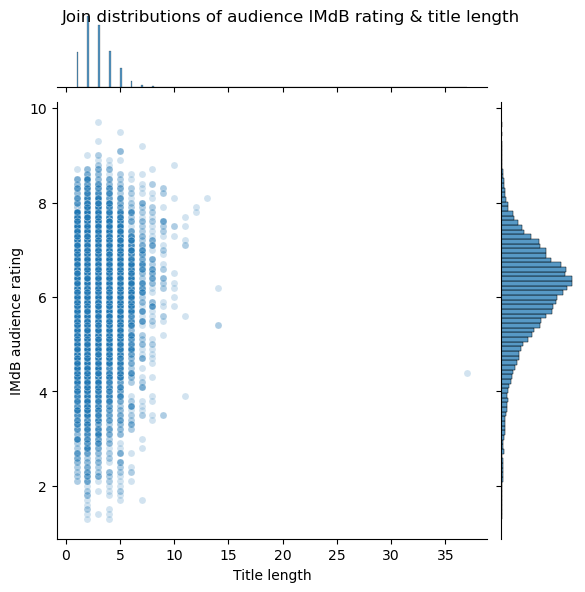

In [ ]:
jplot = sns.jointplot(x='Title_length', y='Audience_imdb_rating', data=cmu_imdb, joint_kws={'s' : 25, 'alpha': 0.2})
plt.xlabel('Title length')
plt.ylabel('IMdB audience rating')
jplot.fig.suptitle('Join distributions of audience IMdB rating & title length')

Text(37.597222222222214, 0.5, 'IMdB audience rating')

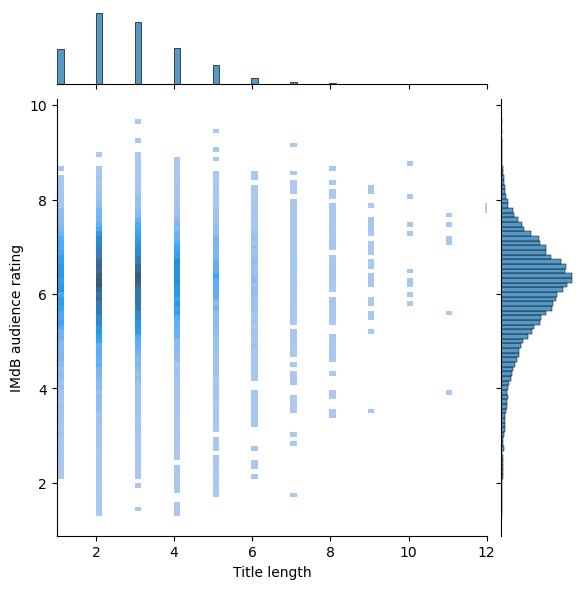

In [ ]:
# xlim = 12 as there are few movies with a title length superior to 12 as shown on the previous plot

sns.jointplot(x='Title_length', y='Audience_imdb_rating', data=cmu_imdb, kind='hist', xlim=(1,12))
plt.xlabel('Title length')
plt.ylabel('IMdB audience rating')

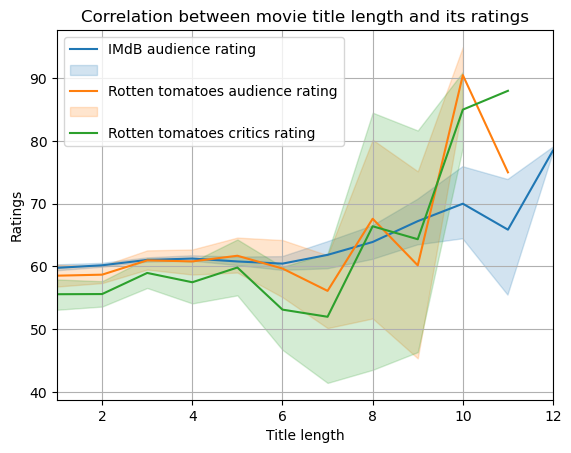

In [ ]:
# Adapt the rating scale of IMdB, as it ranges from 0 to 10 and Rotten tomatoes scale ranges from 0 to 100
cmu_imdb_100 = cmu_imdb.copy(deep=True)
cmu_imdb_100['Audience_imdb_rating'] = cmu_imdb_100['Audience_imdb_rating']*10

plt.figure()
plt.xlim(1,12)
plt.xlabel('Title length')
plt.ylabel('Ratings')
plt.title('Correlation between movie title length and its ratings')
plt.grid()
sns.lineplot(x='Title_length', y='Audience_imdb_rating', errorbar='ci', data=cmu_imdb_100)
sns.lineplot(x='Title_length', y='Audience_rotten_rating', errorbar='ci', data=cmu_rotten)
sns.lineplot(x='Title_length', y='Critics_rotten_rating', errorbar='ci', data=cmu_rotten)
plt.legend(['IMdB audience rating', '', 'Rotten tomatoes audience rating', '', 'Rotten tomatoes critics rating' ])

### Presence of a main character name in the title

In [ ]:
#movies['Character_in_title'] boolean

## Time series analysis of title features

### Title length

In [ ]:
# Add a column for the title length in words
movies['Title_length'] = movies['Movie_name'].apply(count_words)

<Axes: title={'center': 'Average title length per year (confidence interval 95%)'}, xlabel='Movie release year', ylabel='Title length'>

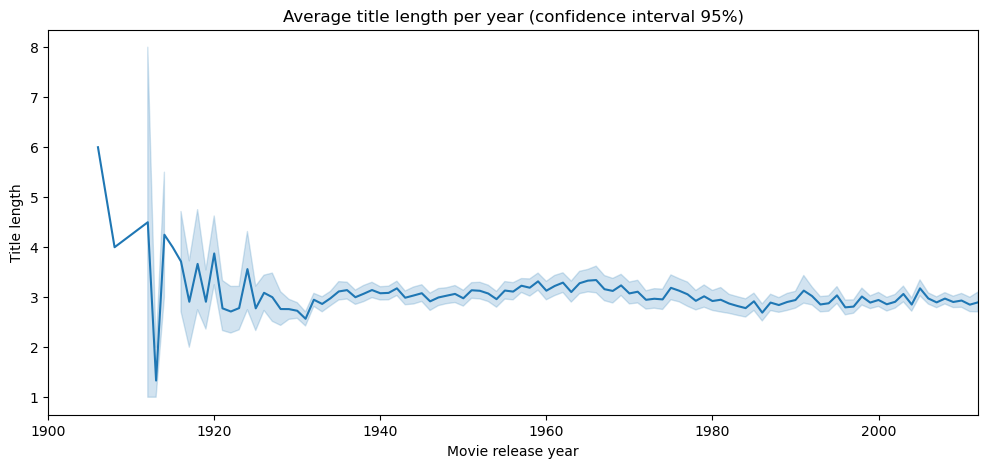

In [ ]:
plt.figure(figsize=(12,5))
plt.xlim(1900,2012)
plt.xlabel('Movie release year')
plt.ylabel('Title length')
plt.title('Average title length per year (confidence interval 95%)')
sns.lineplot(x='Movie_release_date', y='Title_length', errorbar='ci', data=movies)

Text(0.5, 0.98, 'Join distributions of title length and year')

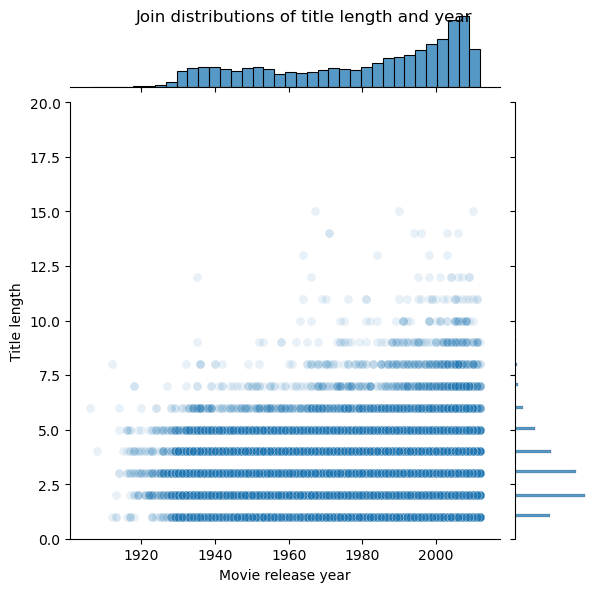

In [ ]:
jplot = sns.jointplot(x='Movie_release_date', y='Title_length', data=movies, joint_kws={'s' : 40, 'alpha': 0.1})
plt.xlabel('Movie release year')
plt.ylabel('Title length')
plt.ylim(0,20)
jplot.fig.suptitle('Join distributions of title length and year')


In [ ]:
movies.head(2)

,Unnamed: 0,Wikipedia_movie_ID,Freebase_movie_ID,Movie_name,Movie_release_date,Movie_box_office_revenue,Movie_runtime,Movie_countries,Movie_main_genre,Character_name,Character_in_title,Title_length
0,0,975900,/m/03vyhn,Ghosts of Mars,2001,14010832.0,98.0,['United States of America'],thriller,"['Akooshay', 'Lieutenant Melanie Ballard', 'De...",False,3
1,1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000,NaN,95.0,['United States of America'],thriller,"['Police Officer', 'Reporter', 'FBI Profiler R...",False,8


In [ ]:
genres = movies.groupby('Movie_main_genre').apply(lambda x: pd.Series({
        'Title_length_year': for y in x['Movie_release_date'] if x['Title_length'].agg(['mean','std'])
    }))
genres.head()

,Title_length
Movie_main_genre,
action,"[3, 5, 1, 2, 2, 2, 3, 8, 2, 2, 4, 1, 6, 2, 4, ..."
adventure,"[2, 2, 11, 4, 2, 1, 4, 8, 1, 5, 4, 6, 6, 2, 8,..."
art,"[3, 2, 5, 5, 6, 4, 4, 2, 2, 4, 4, 4, 3, 2, 2, ..."
comedy,"[3, 6, 3, 3, 3, 3, 2, 4, 3, 5, 2, 2, 3, 3, 5, ..."
documentary,"[3, 3, 4, 1, 2, 3, 2, 7, 4, 1, 2, 2, 1, 1, 3, ..."


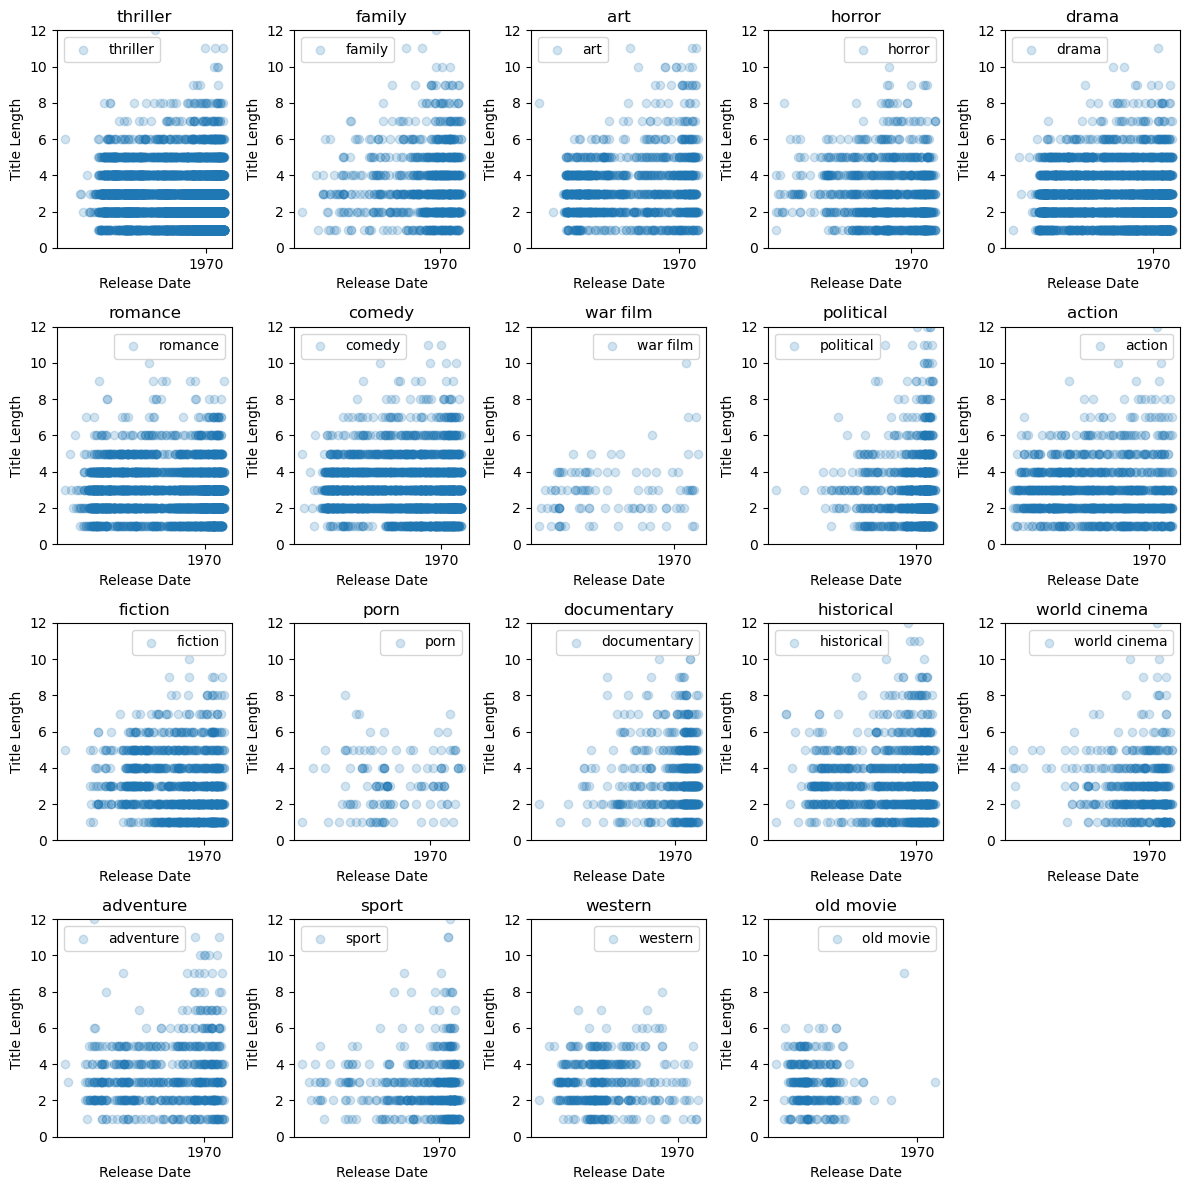

In [ ]:
movies_genres = movies.groupby(['Movie_main_genre', movies['Movie_release_date'].dt.year])['Title_length'].agg(['mean', 'std']).reset_index()

genres = movies['Movie_main_genre'].unique()[:19]

nrows = 4
ncols = 5

plt.figure(figsize=(12, 12))

for i, genre in enumerate(genres, 1):
    plt.subplot(nrows, ncols, i)
    
    genre_data = movies[movies['Movie_main_genre'] == genre]
    
    plt.scatter(genre_data['Movie_release_date'], genre_data['Title_length'], label=genre, alpha=0.2)
    
    plt.title(f'{genre}')
    plt.ylim(0, 12)
    plt.xlabel('Release Date')
    plt.ylabel('Title Length')
    plt.legend()

plt.tight_layout()
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'set_xlabel'

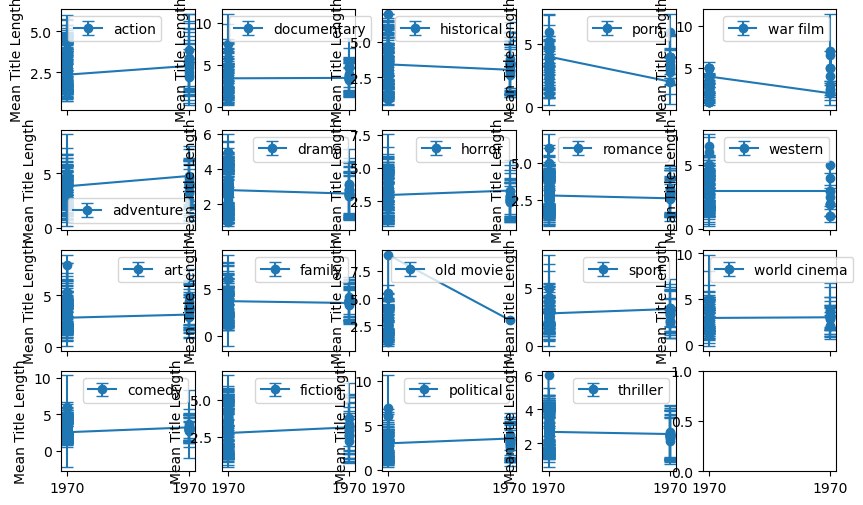

In [ ]:
import math
movies['Movie_release_date'] = pd.to_datetime(movies['Movie_release_date'])

movies_genres = movies.groupby(['Movie_main_genre', 'Movie_release_date'])

mean_values = movies_genres['Title_length'].mean()
std_dev_values = movies_genres['Title_length'].std()

#genres = movies['Movie_main_genre'].unique()[:19]

fig, axes = plt.subplots( nrows=4, ncols=5, figsize=(10, 6), sharex=True )

for i, (genre, data) in enumerate(mean_values.groupby(level=0)):
    ax = axes[i%4, math.floor(i/4)]
    x_values = data.index.get_level_values('Movie_release_date')
    y_values = data.values
    error_values = std_dev_values.loc[genre].values

    ax.errorbar(x_values, y_values, yerr=error_values, label=genre, fmt='o-', capsize=4)
    ax.set_ylabel('Mean Title Length')
    ax.legend()

# Set common x-axis label
axes[-1].set_xlabel('Movie Release Date')

# Adjust layout for better visibility
plt.tight_layout()
plt.show()